In [1]:
import pandas as pd
from pathlib import Path
import numpy as np
from sklearn.metrics import balanced_accuracy_score
from imblearn.metrics import classification_report_imbalanced
from collections import Counter

C:\Users\johng\anaconda3\envs\pyvizenv\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\johng\anaconda3\envs\pyvizenv\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\johng\anaconda3\envs\pyvizenv\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
data_df_initial = pd.read_csv(Path("df_final_outer_patrick.csv"))
data_df_initial = data_df_initial.dropna()
names_df = data_df_initial['Player']
data_df = data_df_initial.drop(columns=['Player','Tm','Unnamed: 0','Cap Hit'])


In [3]:
data_df

,Salary,Age,GP,G,A,PTS,+/-,PIM,PS,EV,...,Tm_VAN,Tm_VEG,Tm_WPG,Tm_WSH,Pos_C,Pos_D,Pos_F,Pos_LW,Pos_RW,Pos_W
0,"10,000,000",25.0,66.000000,35.000000,47.000000,82.000000,32.000000,54.000000,9.900000,19.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,"10,000,000",25.0,23.000000,9.000000,8.000000,17.000000,2.000000,8.000000,1.900000,6.000000,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,"10,000,000",35.0,56.000000,12.000000,42.000000,54.000000,-6.000000,32.000000,4.300000,10.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,"10,000,000",29.0,68.000000,28.000000,22.000000,50.000000,-12.000000,22.000000,5.500000,23.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,"9,500,000",30.0,61.000000,23.000000,36.000000,59.000000,-3.000000,26.000000,5.900000,18.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
656,"500,000",34.0,41.333333,2.666667,8.000000,10.666667,-10.000000,9.333333,0.200000,2.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
657,"412,500",34.0,24.666667,5.333333,6.666667,12.000000,3.333333,8.000000,1.266667,4.666667,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
659,"7,500,000",25.0,61.000000,15.000000,42.000000,57.000000,38.000000,26.000000,9.500000,12.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
661,"4,000,000",29.0,69.000000,6.000000,13.000000,19.000000,-21.000000,49.000000,2.500000,6.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [4]:
#for salary in data_df['Salary']:
#    data_df['Salary'] = int(data_df['Salary'].replace(',',''))
#    print(data_df)

data_df["Salary"] = data_df["Salary"].replace('[,]', '', regex=True).astype(float)
data_df["Salary"]


0      10000000.0
1      10000000.0
2      10000000.0
3      10000000.0
4       9500000.0
          ...    
656      500000.0
657      412500.0
659     7500000.0
661     4000000.0
674     4500000.0
Name: Salary, Length: 628, dtype: float64

In [5]:
# Create our features

#y = data_df["Salary"].astype(float)
y = data_df["Salary"]



In [6]:
# Create our target
X = data_df.drop(columns=['Salary'])

In [7]:
# Split the X and y into X_train, X_test, y_train, y_test
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit the Standard Scaler with the training data
# Scale the training and testing data
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


In [9]:
y = y.array
y =y.reshape(-1, 1)

y_train = y_train.array
y_train =y_train.reshape(-1, 1)

y_test= y_test.array
y_test =y_test.reshape(-1, 1)

In [10]:
X_scaler = scaler.fit(X)
X = X_scaler.transform(X)

In [11]:
y_scaler = scaler
y_scaler.fit(y)
y = y_scaler.transform(y)

In [12]:
y_scaler = scaler.fit(y_train)
y_train = y_scaler.transform(y_train)
y_test = y_scaler.transform(y_test)

In [13]:
y_test

array([[ 2.67867656],
       [ 1.64439995],
       [-0.74513566],
       [ 1.25208813],
       [ 1.44229992],
       [ 1.41852345],
       [-0.65002977],
       [ 2.44091182],
       [ 1.25208813],
       [-0.56681211],
       [-0.31715913],
       [ 2.10804119],
       [ 1.0143234 ],
       [-0.72968095],
       [ 3.62973551],
       [ 0.65767629],
       [ 0.53879392],
       [ 0.96677045],
       [ 0.53879392],
       [ 0.30102918],
       [-0.74513566],
       [ 1.72761761],
       [-0.65002977],
       [ 2.34580592],
       [-0.08414969],
       [-0.72968095],
       [-0.17450029],
       [-0.76891213],
       [-0.76891213],
       [ 2.20314708],
       [ 0.30102918],
       [ 0.7884469 ],
       [-0.5311474 ],
       [-0.69758271],
       [-0.5311474 ],
       [ 2.20314708],
       [ 1.0143234 ],
       [-0.15072382],
       [-0.5311474 ],
       [-0.72968095],
       [ 2.55979419],
       [-0.76891213],
       [-0.34093561],
       [-0.48359445],
       [ 0.78853011],
       [-0

In [14]:
## Linear regression
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
std = np.std(y)

# Print relevant metrics.
#print(f"The score is {score}.")
print(f"The r2 is {r2}.")
print(f"The mean squared error is {mse}.")
print(f"The root mean squared error is {rmse}.")
print(f"The standard deviation is {std}.")


The r2 is 0.2901829543739818.
The mean squared error is 0.8597406742929492.
The root mean squared error is 0.9272220199568975.
The standard deviation is 1.0.


In [15]:
## Lasso
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
model = linear_model.Lasso(alpha=0.1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print relevant metrics.
#print(f"The score is {score}.")
print(f"The r2 is {r2}.")
print(f"The mean squared error is {mse}.")
print(f"The root mean squared error is {rmse}.")

The r2 is 0.3617139584543433.
The mean squared error is 0.773101287341254.
The root mean squared error is 0.8792617854434788.


In [16]:
## DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print relevant metrics.
#print(f"The score is {score}.")
print(f"The r2 is {r2}.")
print(f"The mean squared error is {mse}.")
print(f"The root mean squared error is {rmse}.")

The r2 is -0.04494472776481673.
The mean squared error is 1.2656521710535487.
The root mean squared error is 1.1250120759589866.


In [17]:
## HuberRegressor (factors in outliers)
from sklearn.linear_model import HuberRegressor, LinearRegression
model = HuberRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print relevant metrics.
#print(f"The score is {score}.")
print(f"The r2 is {r2}.")
print(f"The mean squared error is {mse}.")
print(f"The root mean squared error is {rmse}.")

The r2 is 0.28486347426706005.
The mean squared error is 0.8661837055531797.
The root mean squared error is 0.9306899083761356.


C:\Users\johng\anaconda3\envs\pyvizenv\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\johng\anaconda3\envs\pyvizenv\lib\site-packages\sklearn\linear_model\_huber.py:332: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [18]:
## data must be very non linear, maybe use Tensorflow or Keras

import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow import keras

In [19]:
tf.random.set_seed(420)

In [20]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 2332769793515801947
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 5731516416
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 6412238451259815192
 physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3070 Ti, pci bus id: 0000:01:00.0, compute capability: 8.6"
 xla_global_id: 416903419]

In [21]:
X.shape

(628, 62)

In [22]:
number_inputs = 62
number_hidden_nodes = 200

In [23]:
nn = Sequential()
nn.add(Dense(units=number_hidden_nodes, input_dim=number_inputs, activation="selu"))
nn.add(Dense(1, activation="selu"))

In [24]:
# Compile model
nn.compile(loss=keras.losses.MeanSquaredError(), optimizer="adam",metrics=["mean_squared_error"])

In [25]:
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 200)               12600     
                                                                 
 dense_1 (Dense)             (None, 200)               40200     
                                                                 
 dense_2 (Dense)             (None, 200)               40200     
                                                                 
 dense_3 (Dense)             (None, 200)               40200     
                                                                 
 dense_4 (Dense)             (None, 200)               40200     
                                                                 
 dense_5 (Dense)             (None, 200)               40200     
                                                                 
 dense_6 (Dense)             (None, 200)               4

In [26]:
# Fit the model
nn_model = nn.fit(X_train, y_train, epochs=1500)

Epoch 1/1500
15/15 [==============================] - 1s 3ms/step - loss: 1.0180 - mean_squared_error: 1.0180
Epoch 2/1500
15/15 [==============================] - 0s 3ms/step - loss: 1.0000 - mean_squared_error: 1.0000
Epoch 3/1500
15/15 [==============================] - 0s 3ms/step - loss: 1.0000 - mean_squared_error: 1.0000
Epoch 4/1500
15/15 [==============================] - 0s 4ms/step - loss: 1.0000 - mean_squared_error: 1.0000
Epoch 5/1500
15/15 [==============================] - 0s 3ms/step - loss: 1.0000 - mean_squared_error: 1.0000
Epoch 6/1500
15/15 [==============================] - 0s 3ms/step - loss: 1.0000 - mean_squared_error: 1.0000
Epoch 7/1500
15/15 [==============================] - 0s 3ms/step - loss: 1.0000 - mean_squared_error: 1.0000
Epoch 8/1500
15/15 [==============================] - 0s 3ms/step - loss: 1.0000 - mean_squared_error: 1.0000
Epoch 9/1500
15/15 [==============================] - 0s 3ms/step - loss: 1.0000 - mean_squared_error: 1.0000
Epoch 10/1

KeyboardInterrupt: 

In [ ]:
#y_scaler = scaler
#y_scaler.fit(y)
#y = y_scaler.transform(y)
#from sklearn.preprocessing import inverse_transform
y_pred = nn.predict(X)
y_pred_salary = y_scaler.inverse_transform(y_pred)

In [ ]:
y_pred_salary

array([[4713629.5],
       [4713629.5],
       [4713629.5],
       [4713629.5],
       [4713629.5],
       [4713629.5],
       [4713629.5],
       [4713629.5],
       [4713629.5],
       [4713629.5],
       [4713629.5],
       [4713629.5],
       [4713629.5],
       [4713629.5],
       [4713629.5],
       [4713629.5],
       [4713629.5],
       [2519986.8],
       [4713629.5],
       [4713629.5],
       [4713629.5],
       [4713602.5],
       [4713629.5],
       [4713629.5],
       [4713629.5],
       [4713629.5],
       [4713629.5],
       [4713629.5],
       [4713629.5],
       [2519986.2],
       [4713629.5],
       [4713629.5],
       [4713629.5],
       [4713629.5],
       [4713629.5],
       [4713629.5],
       [4713629.5],
       [4713629.5],
       [4713629.5],
       [4713629.5],
       [4713629.5],
       [4713629.5],
       [4713629.5],
       [4713629.5],
       [4713614.5],
       [4713629.5],
       [4713629.5],
       [4713629.5],
       [4713629.5],
       [2527914. ],


In [ ]:
model_loss, model_accuracy = nn.evaluate(X_test, y_test, verbose=2)
print(f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

5/5 - 0s - loss: 0.9033 - mean_squared_error: 0.9033 - 109ms/epoch - 22ms/step
Normal Neural Network - Loss: 0.9032996296882629, Accuracy: 0.9032996296882629



Bad key text.latex.preview in file C:\Users\johng\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.0/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file C:\Users\johng\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.0/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file C:\Users\johng\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is saved, 

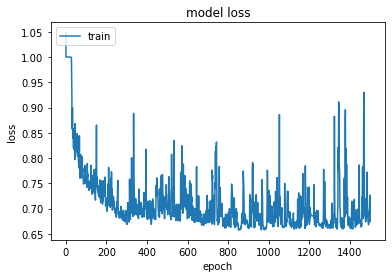

In [ ]:
import matplotlib.pyplot as plt
# summarize history for loss
plt.plot(nn_model.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# Compute the metrics for the linear regression model
#from sklearn.metrics import mean_squared_error, r2_score
#score = nn_model.score(X_test, y_test, sample_weight=None)
#r2 = r2_score(y_test, y_pred)
#mse = mean_squared_error(y_test, y_pred)
#rmse = np.sqrt(mse)
#std = np.std(y)

# Print relevant metrics.
#print(f"The score is {score}.")
#print(f"The r2 is {r2}.")
#print(f"The mean squared error is {mse}.")
#print(f"The root mean squared error is {rmse}.")
#print(f"The standard deviation is {std}.")

In [ ]:
y_pred = nn.predict(X)
data_df_initial["Y Scaled"] = y
data_df_initial["Y Pred"]= y_pred
data_df_initial["Predicted Salary"]= y_pred_salary
df_review = data_df_initial
df_review=df_review.sort_values("Y Pred")

In [ ]:
from lime.lime_tabular import LimeTabularExplainer

explainer = LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    mode='regression'
)

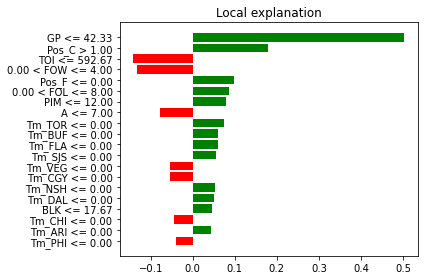

In [ ]:
exp = explainer.explain_instance(X[15], nn.predict,
        num_features=20)

exp.as_pyplot_figure()
from matplotlib import pyplot as plt
plt.tight_layout()

In [ ]:
df_review.head(75)

,Unnamed: 0,Player,Tm,Salary,Cap Hit,Age,GP,G,A,PTS,...,Tm_WSH,Pos_C,Pos_D,Pos_F,Pos_LW,Pos_RW,Pos_W,Y Scaled,Y Pred,Predicted Salary
178,210,Mark Giordano,TOR,"3,375,000","3,375,000",38.0,40.666667,4.666667,12.666667,17.333333,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.412256,0.000016,2519984.75
493,553,Gerald Mayhew,ANA,"800,000","800,000",29.0,21.333333,5.333333,0.000000,5.333333,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.776100,0.000016,2519984.75
358,409,Brett Kulak,EDM,"1,100,000","925,000",28.0,41.333333,2.666667,8.666667,11.333333,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.637651,0.000016,2519984.75
645,717,Colin Blackwell,TOR,"750,000","725,000",28.0,29.333333,6.000000,6.000000,12.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.799175,0.000016,2519984.75
295,338,Justin Braun,NYR,"1,800,000","1,800,000",34.0,42.000000,3.333333,7.333333,10.666667,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.314602,0.000016,2519984.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,355,Zach Hyman,EDM,"1,550,000","5,500,000",29.0,64.000000,24.000000,23.000000,47.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.429977,0.000017,2519986.50
17,17,Anze Kopitar,LAK,"8,000,000","10,000,000",34.0,71.000000,18.000000,41.000000,59.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.546683,0.000017,2519986.75
597,665,Jacob Moverare,LAK,"750,000","750,000",23.0,14.000000,0.000000,1.000000,1.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.799175,0.000017,2519986.75
596,664,Sean Durzi,LAK,"750,000","809,166",23.0,53.000000,3.000000,21.000000,24.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.799175,0.000017,2519987.00


In [ ]:
df_review.tail(75)

,Unnamed: 0,Player,Tm,Salary,Cap Hit,Age,GP,G,A,PTS,...,Tm_WSH,Pos_C,Pos_D,Pos_F,Pos_LW,Pos_RW,Pos_W,Y Scaled,Y Pred,Predicted Salary
423,479,Joshua Norris,OTT,"832,500","925,000",22.0,52.000000,30.000000,13.0,43.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.761101,0.999989,4713629.5
420,476,Sam Gagner,DET,"850,000","850,000",32.0,68.000000,8.000000,16.0,24.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.753025,0.999989,4713629.5
101,119,Mattias Ekholm,NSH,"5,000,000","3,750,000",31.0,63.000000,5.000000,18.0,23.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.162190,0.999989,4713629.5
418,473,Phil Kessel,ARI,"850,000","6,800,000",34.0,69.000000,7.000000,36.0,43.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.753025,0.999989,4713629.5
417,472,Libor Hajek,NYR,"874,125","874,125",23.0,16.000000,0.000000,1.0,1.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.741891,0.999989,4713629.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,396,Nicolas Aube-Kubel,COL,"1,225,000","1,075,000",25.0,41.333333,5.333333,6.0,11.333333,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.579963,0.999989,4713629.5
128,149,Brady Skjei,CAR,"4,400,000","5,250,000",27.0,69.000000,8.000000,21.0,29.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.885292,0.999989,4713629.5
130,153,Alec Martinez,VEG,"4,250,000","5,250,000",34.0,15.000000,0.000000,4.0,4.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.816067,0.999989,4713629.5
133,156,Chris Tierney,OTT,"4,200,000","3,500,000",27.0,58.000000,6.000000,11.0,17.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.792992,0.999989,4713629.5


In [ ]:
df_review['Predicted Salary'].value_counts()

4713629.50    429
2519984.75     27
4713629.00     20
2519985.00     20
2519985.25      9
             ... 
2520040.75      1
2520036.00      1
2520024.50      1
2520011.50      1
2520366.25      1
Name: Predicted Salary, Length: 99, dtype: int64

<AxesSubplot:xlabel='Salary', ylabel='Predicted Salary'>

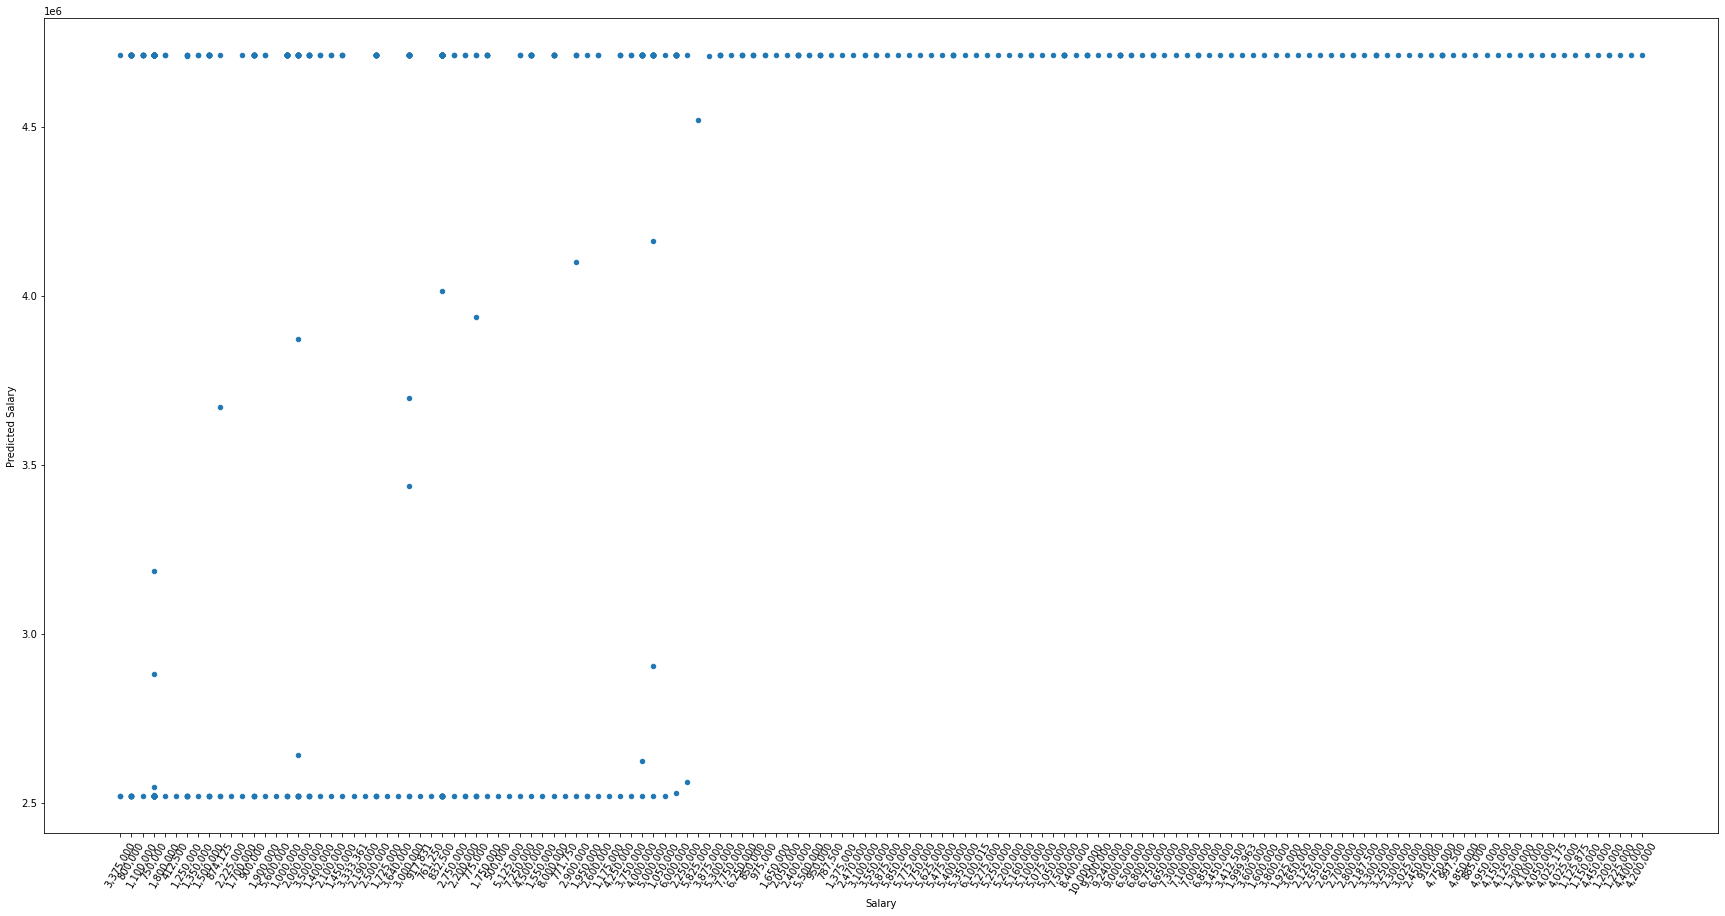

In [ ]:
import hvplot
#df_review = pd.DataFrame(df_review)
df_review.plot.scatter(x='Salary', y='Predicted Salary',figsize=(30,15),rot=60)

In [ ]:
df_review['Delta'] = df_review['Predicted Salary'] - data_df['Salary']

In [ ]:
df_review.head(10)

,Unnamed: 0,Player,Tm,Salary,Cap Hit,Age,GP,G,A,PTS,...,Pos_C,Pos_D,Pos_F,Pos_LW,Pos_RW,Pos_W,Y Scaled,Y Pred,Predicted Salary,Delta
178,210,Mark Giordano,TOR,"3,375,000","3,375,000",38.0,40.666667,4.666667,12.666667,17.333333,...,0.0,1.0,0.0,0.0,0.0,0.0,0.412256,0.000016,2519984.75,-855015.25
493,553,Gerald Mayhew,ANA,"800,000","800,000",29.0,21.333333,5.333333,0.000000,5.333333,...,0.0,0.0,1.0,0.0,0.0,0.0,-0.776100,0.000016,2519984.75,1719984.75
358,409,Brett Kulak,EDM,"1,100,000","925,000",28.0,41.333333,2.666667,8.666667,11.333333,...,0.0,1.0,0.0,0.0,0.0,0.0,-0.637651,0.000016,2519984.75,1419984.75
645,717,Colin Blackwell,TOR,"750,000","725,000",28.0,29.333333,6.000000,6.000000,12.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,-0.799175,0.000016,2519984.75,1769984.75
295,338,Justin Braun,NYR,"1,800,000","1,800,000",34.0,42.000000,3.333333,7.333333,10.666667,...,0.0,1.0,0.0,0.0,0.0,0.0,-0.314602,0.000016,2519984.75,719984.75
657,731,Derick Brassard,EDM,"412,500","412,500",34.0,24.666667,5.333333,6.666667,12.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,-0.954930,0.000016,2519984.75,2107484.75
344,394,Ben Chiarot,FLA,"1,250,000","1,750,000",30.0,40.666667,5.333333,9.333333,14.666667,...,0.0,1.0,0.0,0.0,0.0,0.0,-0.568426,0.000016,2519984.75,1269984.75
501,561,Blake Lizotte,LAK,"800,000","800,000",24.0,61.000000,8.000000,11.000000,19.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,-0.776100,0.000016,2519984.75,1719984.75
335,384,Ilya Lyubushkin,TOR,"1,350,000","1,350,000",27.0,42.666667,0.000000,6.666667,6.666667,...,0.0,1.0,0.0,0.0,0.0,0.0,-0.522276,0.000016,2519984.75,1169984.75
177,209,Hampus Lindholm,BOS,"3,375,000","2,602,778",28.0,44.000000,3.333333,13.333333,16.666667,...,0.0,1.0,0.0,0.0,0.0,0.0,0.412256,0.000016,2519984.75,-855015.25


In [ ]:
df_review.tail(10)

,Unnamed: 0,Player,Tm,Salary,Cap Hit,Age,GP,G,A,PTS,...,Pos_C,Pos_D,Pos_F,Pos_LW,Pos_RW,Pos_W,Y Scaled,Y Pred,Predicted Salary,Delta
351,401,Christian Fischer,ARI,"1,125,875","1,000,000",24.0,53.000000,5.000000,5.000000,10.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,-0.625709,0.999989,4713629.5,3587754.5
350,400,Artturi Lehkonen,COL,"1,150,000","1,150,000",26.0,40.666667,8.666667,10.666667,19.333333,...,0.0,0.0,0.0,1.0,0.0,0.0,-0.614576,0.999989,4713629.5,3563629.5
127,148,Alex Killorn,TBL,"4,450,000","4,450,000",32.0,68.000000,21.000000,31.000000,52.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.908366,0.999989,4713629.5,263629.5
348,398,Jay Beagle,ARI,"1,200,000","3,000,000",36.0,26.000000,1.000000,0.000000,1.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,-0.591501,0.999989,4713629.5,3513629.5
347,397,Victor Mete,OTT,"1,200,000","1,200,000",23.0,34.000000,0.000000,7.000000,7.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,-0.591501,0.999989,4713629.5,3513629.5
346,396,Nicolas Aube-Kubel,COL,"1,225,000","1,075,000",25.0,41.333333,5.333333,6.000000,11.333333,...,0.0,0.0,0.0,0.0,1.0,0.0,-0.579963,0.999989,4713629.5,3488629.5
128,149,Brady Skjei,CAR,"4,400,000","5,250,000",27.0,69.000000,8.000000,21.000000,29.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.885292,0.999989,4713629.5,313629.5
130,153,Alec Martinez,VEG,"4,250,000","5,250,000",34.0,15.000000,0.000000,4.000000,4.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.816067,0.999989,4713629.5,463629.5
133,156,Chris Tierney,OTT,"4,200,000","3,500,000",27.0,58.000000,6.000000,11.000000,17.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.792992,0.999989,4713629.5,513629.5
0,0,Mikko Rantanen,COL,"10,000,000","9,250,000",25.0,66.000000,35.000000,47.000000,82.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,3.469678,0.999989,4713629.5,-5286370.5
